In [90]:
import pandas as pd
import numpy as np

In [91]:
df = pd.read_csv('data.csv')

In [92]:
acoustic = df[df.columns[13:27]]

In [93]:
psych = df[df.columns[27:34]]
psych.head()

,Aggressive music,Complex music,Inspiring music,Intelligent music,Relaxing music,Romantic music,Sad music
0,4,4,4,5,5,3,5
1,4,4,4,4,4,4,4
2,2,2,2,2,2,2,2
3,5,5,5,4,1,1,1
4,1,4,5,5,3,4,4


In [94]:
lvm = df[df.columns[34]]
lvm 

0     2
1     4
2     1
3     2
4     2
5     2
6     2
7     1
8     1
9     1
10    4
11    4
12    1
13    1
14    5
15    2
16    2
17    4
18    2
19    4
20    3
21    3
22    1
23    5
24    5
25    2
26    4
27    1
28    5
29    2
Name: Lyrics vs Melody, dtype: int64

In [95]:
acoustic.head()

,Loud,Heavy Bass,Brass,Woodwind,Dense,Fast,Percussive,Raspy voice,Piano,Distorted,Yelling voice,Instrumental,Synthesizer,Electric
0,3,5,5,3,3,4,5,5,3,5,4,5,4,4
1,4,5,3,3,3,4,3,2,4,3,4,4,3,4
2,2,3,3,5,2,4,4,4,4,1,1,4,3,3
3,3,5,3,1,4,4,4,1,3,1,1,4,4,4
4,2,2,4,4,3,4,4,2,4,2,1,5,3,4


In [96]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_acoustic = calculate_kmo(acoustic)
kmo_acoustic

(array([0.50628127, 0.63728479, 0.35294486, 0.50070397, 0.36584015,
        0.30776772, 0.57971592, 0.50856381, 0.5792332 , 0.66231777,
        0.70221581, 0.51162313, 0.56912636, 0.52299312]),
 0.5253021920678389)

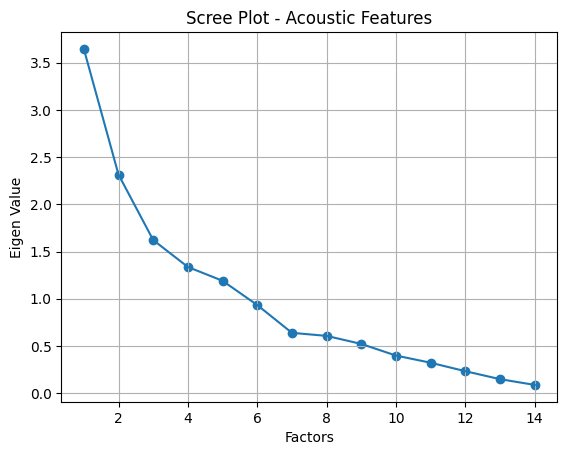

In [121]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
fa = FactorAnalyzer(rotation = None,impute = "drop",n_factors=acoustic.shape[1])
fa.fit(acoustic)
ev,_ = fa.get_eigenvalues()
plt.scatter(range(1,acoustic.shape[1]+1),ev)
plt.plot(range(1,acoustic.shape[1]+1),ev)
plt.title('Scree Plot - Acoustic Features')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

In [98]:
fa = FactorAnalyzer(n_factors=6,rotation='varimax')
PCA_acoustic = fa.fit_transform(acoustic)
vals = pd.DataFrame(fa.loadings_,index=acoustic.columns)
print(vals[vals > 0.5])

                      0         1         2         3         4         5
Loud                NaN       NaN  0.551009       NaN       NaN       NaN
Heavy Bass     0.683445       NaN       NaN       NaN       NaN       NaN
Brass               NaN       NaN       NaN       NaN       NaN  0.765333
Woodwind            NaN       NaN       NaN       NaN       NaN  0.511335
Dense               NaN       NaN  0.605537       NaN       NaN       NaN
Fast                NaN       NaN       NaN       NaN  0.854736       NaN
Percussive          NaN       NaN       NaN       NaN       NaN       NaN
Raspy voice         NaN       NaN  0.700482       NaN       NaN       NaN
Piano               NaN       NaN       NaN  0.562518       NaN       NaN
Distorted      0.763460       NaN       NaN       NaN       NaN       NaN
Yelling voice  0.803165       NaN       NaN       NaN       NaN       NaN
Instrumental        NaN       NaN       NaN  0.786082       NaN       NaN
Synthesizer         NaN  0.817965     

In [99]:
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                         0         1         2         3         4         5
Variance          2.206916  1.781812  1.315667  1.276876  1.196982  1.142704
Proportional Var  0.157637  0.127272  0.093976  0.091205  0.085499  0.081622
Cumulative Var    0.157637  0.284909  0.378885  0.470091  0.555590  0.637211


In [100]:
kmo_psych = calculate_kmo(psych)
kmo_psych

(array([0.37408975, 0.55299172, 0.51882093, 0.49652014, 0.79228907,
        0.64316938, 0.50209949]),
 0.5419325528267043)

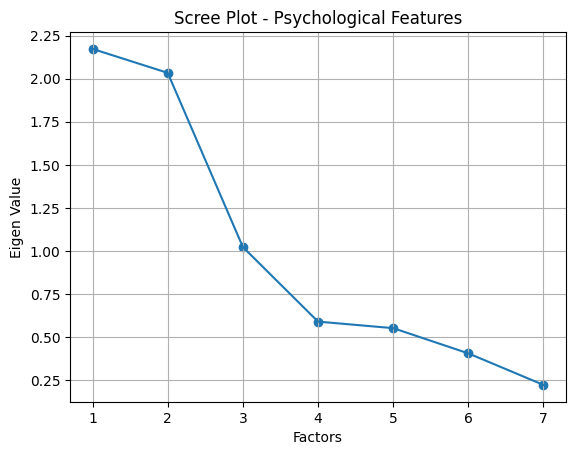

In [122]:
fa_psych = FactorAnalyzer(rotation = None,impute = "drop",n_factors=psych.shape[1])
fa_psych.fit(psych)
ev,_ = fa_psych.get_eigenvalues()
plt.scatter(range(1,psych.shape[1]+1),ev)
plt.plot(range(1,psych.shape[1]+1),ev)
plt.title('Scree Plot - Psychological Features')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

In [102]:
fa_psych = FactorAnalyzer(n_factors=3,rotation='varimax')
PCA_psych = fa_psych.fit_transform(psych)
vals = pd.DataFrame(fa_psych.loadings_,index=psych.columns)
print(vals[vals > 0.5])

                          0         1         2
Aggressive music        NaN       NaN  0.994846
Complex music           NaN       NaN       NaN
Inspiring music    0.733858       NaN       NaN
Intelligent music  0.891030       NaN       NaN
Relaxing music          NaN  0.513902       NaN
Romantic music          NaN  0.806924       NaN
Sad music               NaN  0.635021       NaN


In [103]:
print(pd.DataFrame(fa_psych.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                         0         1         2
Variance          1.641164  1.437803  1.200169
Proportional Var  0.234452  0.205400  0.171453
Cumulative Var    0.234452  0.439852  0.611305


In [104]:
PCA_psych = pd.DataFrame(PCA_psych, columns=['Intellectual', 'Easy listening', 'Aggressive'])
PCA_psych.head()

,Intellectual,Easy listening,Aggressive
0,0.939711,0.296537,0.857467
1,0.169762,0.381347,0.831079
2,-2.087235,-1.240804,-0.811630
3,0.622151,-2.262132,1.218216
4,1.142055,-0.126232,-1.659135


In [105]:
PCA_acoustic = pd.DataFrame(PCA_acoustic, columns=['Heavy and yelling', 'Electronic', 'Loud, Dense & Raspy', 'Piano&Synth','Fast', 'Wind Instruments'])
PCA_acoustic.head()

,Heavy and yelling,Electronic,"Loud, Dense & Raspy",Piano&Synth,Fast,Wind Instruments
0,1.785673,-0.199814,0.073798,0.419438,-0.088391,1.732611
1,1.029024,0.035827,-0.005664,-0.221537,0.459319,-0.530336
2,-0.948317,-0.633667,-0.612264,0.152399,0.400516,0.914202
3,-0.384965,1.081332,-0.814069,-1.116441,0.137912,-0.394622
4,-0.830101,-0.099653,-0.519463,0.507505,0.294658,1.105338


In [106]:
bfi = pd.read_csv('Psych_Scores.csv')
bfi = bfi[bfi.columns[1:]]
bfi.head()

,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism
0,4.75,3.75,2.25,4.25,3.0
1,3.25,2.50,4.00,4.00,2.5
2,3.75,2.25,2.00,2.00,3.0
3,5.00,3.25,2.00,3.75,3.0
4,3.75,1.75,3.00,4.75,3.0


In [107]:
result = pd.concat([PCA_acoustic, PCA_psych], axis=1)
result.head()

,Heavy and yelling,Electronic,"Loud, Dense & Raspy",Piano&Synth,Fast,Wind Instruments,Intellectual,Easy listening,Aggressive
0,1.785673,-0.199814,0.073798,0.419438,-0.088391,1.732611,0.939711,0.296537,0.857467
1,1.029024,0.035827,-0.005664,-0.221537,0.459319,-0.530336,0.169762,0.381347,0.831079
2,-0.948317,-0.633667,-0.612264,0.152399,0.400516,0.914202,-2.087235,-1.240804,-0.811630
3,-0.384965,1.081332,-0.814069,-1.116441,0.137912,-0.394622,0.622151,-2.262132,1.218216
4,-0.830101,-0.099653,-0.519463,0.507505,0.294658,1.105338,1.142055,-0.126232,-1.659135


In [108]:
result = pd.concat([bfi,result], axis=1)
result.head()

,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,Heavy and yelling,Electronic,"Loud, Dense & Raspy",Piano&Synth,Fast,Wind Instruments,Intellectual,Easy listening,Aggressive
0,4.75,3.75,2.25,4.25,3.0,1.785673,-0.199814,0.073798,0.419438,-0.088391,1.732611,0.939711,0.296537,0.857467
1,3.25,2.50,4.00,4.00,2.5,1.029024,0.035827,-0.005664,-0.221537,0.459319,-0.530336,0.169762,0.381347,0.831079
2,3.75,2.25,2.00,2.00,3.0,-0.948317,-0.633667,-0.612264,0.152399,0.400516,0.914202,-2.087235,-1.240804,-0.811630
3,5.00,3.25,2.00,3.75,3.0,-0.384965,1.081332,-0.814069,-1.116441,0.137912,-0.394622,0.622151,-2.262132,1.218216
4,3.75,1.75,3.00,4.75,3.0,-0.830101,-0.099653,-0.519463,0.507505,0.294658,1.105338,1.142055,-0.126232,-1.659135


In [109]:
result = pd.concat([result, lvm], axis=1)
result.tail()

,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,Heavy and yelling,Electronic,"Loud, Dense & Raspy",Piano&Synth,Fast,Wind Instruments,Intellectual,Easy listening,Aggressive,Lyrics vs Melody
25,3.75,3.00,3.50,4.00,3.00,-0.133337,0.092305,0.217215,0.408905,0.330606,0.462932,1.523851,-0.988801,0.644797,2
26,3.25,3.25,3.00,3.00,3.25,-0.576688,-0.486634,0.430628,-0.022324,0.294050,1.339003,0.083559,0.596377,0.102312,4
27,3.75,2.00,2.75,4.00,3.25,1.415900,0.939039,-0.541421,-0.074975,1.460638,1.243508,1.240422,0.064617,0.763990,1
28,3.75,3.75,2.50,3.25,2.75,-0.643134,-2.525596,0.418855,-1.538670,-0.914365,-1.010520,-0.171294,0.463747,0.178514,5
29,4.25,3.25,3.75,4.00,3.00,-0.487066,1.303830,-1.111569,0.796540,0.586409,-0.745166,0.427813,-1.750850,-0.967438,2


In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

In [111]:
result.corr()

,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,Heavy and yelling,Electronic,"Loud, Dense & Raspy",Piano&Synth,Fast,Wind Instruments,Intellectual,Easy listening,Aggressive,Lyrics vs Melody
Openness,1.000000,0.276372,-0.250092,0.250038,-0.018101,0.050758,0.221647,-0.257892,-0.362636,-0.253282,-0.024774,0.243230,-0.201286,0.014839,-0.205635
Conscientiousness,0.276372,1.000000,-0.065146,-0.151054,0.061338,-0.160141,-0.121476,0.078326,-0.186394,-0.357698,0.180657,0.336257,-0.000454,-0.114248,0.126626
Extraversion,-0.250092,-0.065146,1.000000,-0.074644,-0.306388,0.078064,0.311148,0.358705,0.069456,0.084291,-0.045946,0.149335,0.241905,0.084411,0.243506
Agreeableness,0.250038,-0.151054,-0.074644,1.000000,0.073223,0.368925,0.157747,-0.058644,-0.009055,-0.129614,-0.036271,0.157090,-0.148124,0.008751,-0.299288
Neuroticism,-0.018101,0.061338,-0.306388,0.073223,1.000000,-0.038865,-0.137980,-0.386768,0.509434,-0.006363,-0.090685,0.283610,-0.121221,-0.173588,-0.329424
Heavy and yelling,0.050758,-0.160141,0.078064,0.368925,-0.038865,1.000000,0.096309,0.054595,-0.026116,0.026612,0.027987,0.064871,0.000334,0.774379,-0.417328
Electronic,0.221647,-0.121476,0.311148,0.157747,-0.137980,0.096309,1.000000,0.000819,0.093641,0.046339,-0.009186,0.141844,-0.156376,0.021072,-0.277767
"Loud, Dense & Raspy",-0.257892,0.078326,0.358705,-0.058644,-0.386768,0.054595,0.000819,1.000000,-0.057502,0.075014,-0.010379,-0.125294,0.201166,0.149003,0.443391
Piano&Synth,-0.362636,-0.186394,0.069456,-0.009055,0.509434,-0.026116,0.093641,-0.057502,1.000000,-0.014312,0.033520,0.232726,0.025735,-0.212286,-0.274571
Fast,-0.253282,-0.357698,0.084291,-0.129614,-0.006363,0.026612,0.046339,0.075014,-0.014312,1.000000,-0.010028,-0.084987,-0.225176,0.191771,0.254347


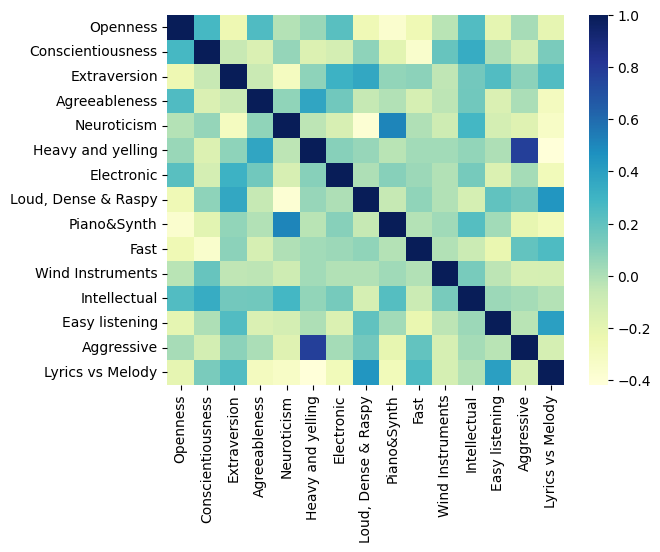

In [112]:
dataplot = sns.heatmap(result.corr(), cmap="YlGnBu")

plt.show()

In [119]:
from scipy.stats import pearsonr
import numpy as np
rho = result.corr()
pval = result.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
corr_result = rho.round(2).astype(str) + p

In [120]:
mask_corr = corr_result.mask(np.triu(np.ones(corr_result.shape, dtype=np.bool_)))
mask_corr

,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,Heavy and yelling,Electronic,"Loud, Dense & Raspy",Piano&Synth,Fast,Wind Instruments,Intellectual,Easy listening,Aggressive,Lyrics vs Melody
Openness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Conscientiousness,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Extraversion,-0.25,-0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Agreeableness,0.25,-0.15,-0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Neuroticism,-0.02,0.06,-0.31,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Heavy and yelling,0.05,-0.16,0.08,0.37*,-0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Electronic,0.22,-0.12,0.31,0.16,-0.14,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Loud, Dense & Raspy",-0.26,0.08,0.36,-0.06,-0.39*,0.05,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Piano&Synth,-0.36*,-0.19,0.07,-0.01,0.51**,-0.03,0.09,-0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fast,-0.25,-0.36,0.08,-0.13,-0.01,0.03,0.05,0.08,-0.01,NaN,NaN,NaN,NaN,NaN,NaN


#### Significant results -


Heavy&Yelling vs Agreeableness: 0.37*

LoudDenseRaspy vs Neuroticism: -0.39*

Keyboard vs Openness : -0.36*

Keyboard vs Neuroticism: 0.51**

Agressive vs HeavyYelling: 0.77**

LM vs HeavyYelling: -0.42*

LM vs LoudDenseRaspy: 0.44*

LM vs EasyListening: 0.4*


#### Notable mentions - 

Neuro vs Extraversion: -0.31

LoudDense vs Extraversion: 0.36

Fast vs Consciestousness: -0.36

Intellectual vs Consciestousness: 0.34

Neuro vs LM: -0.33

LM vs Aggreableness: -0.3


lvm - 1 melody, 5 lyrics

In [115]:
result.to_csv('kitchensink.csv')


In [139]:
likes = pd.read_csv('liwc_liked_common.csv')
dislikes = pd.read_csv('liwc_disliked_common.csv')

In [140]:
likes.head()

,"I-words (I, me, my)",Positive Tone,Negative Tone,Social Words,Cognitive Processes,Allure,Moralization,Analytic,Authentic
0,6.962500,4.235000,0.2100,10.070000,11.030000,12.8675,0.000000,51.200000,99.000000
1,8.275000,3.842500,1.2875,11.327500,11.635000,10.3500,0.145000,33.665000,98.032500
2,11.942000,3.378000,1.0700,7.924000,6.626000,11.3060,0.000000,31.184000,92.024000
3,9.380000,3.426000,2.5400,9.296000,8.476000,9.7700,0.416000,33.134000,71.908000
4,5.016667,2.686667,2.9200,12.683333,9.423333,13.1600,0.646667,34.136667,94.736667


In [141]:
dislikes.head()

,"I-words (I, me, my)",Positive Tone,Negative Tone,Social Words,Cognitive Processes,Allure,Moralization,Analytic,Authentic
0,6.984,3.036,2.948,14.066,9.128,10.056,0.454,18.552,49.646
1,5.562,1.634,0.954,4.732,6.388,6.746,0.056,11.936,49.952
2,7.578,4.394,1.060,9.204,6.778,8.648,0.096,25.160,75.076
3,3.034,3.144,0.414,7.594,3.508,6.366,0.184,32.770,36.410
4,4.044,1.428,1.010,7.828,8.170,6.642,0.082,18.226,50.454


In [137]:
allsongs = pd.concat([likes, dislikes], axis=1)
allsongs.head()

,"liked_I-words (I, me, my)",liked_Positive Tone,liked_Negative Tone,liked_Social Words,liked_Cognitive Processes,liked_Allure,liked_Moralization,liked_Analytic,liked_Authentic,"disliked_I-words (I, me, my)",disliked_Positive Tone,disliked_Negative Tone,disliked_Social Words,disliked_Cognitive Processes,disliked_Allure,disliked_Moralization,disliked_Analytic,disliked_Authentic
0,6.962500,4.235000,0.2100,10.070000,11.030000,12.8675,0.000000,51.200000,99.000000,6.984,3.036,2.948,14.066,9.128,10.056,0.454,18.552,49.646
1,8.275000,3.842500,1.2875,11.327500,11.635000,10.3500,0.145000,33.665000,98.032500,5.562,1.634,0.954,4.732,6.388,6.746,0.056,11.936,49.952
2,11.942000,3.378000,1.0700,7.924000,6.626000,11.3060,0.000000,31.184000,92.024000,7.578,4.394,1.060,9.204,6.778,8.648,0.096,25.160,75.076
3,9.380000,3.426000,2.5400,9.296000,8.476000,9.7700,0.416000,33.134000,71.908000,3.034,3.144,0.414,7.594,3.508,6.366,0.184,32.770,36.410
4,5.016667,2.686667,2.9200,12.683333,9.423333,13.1600,0.646667,34.136667,94.736667,4.044,1.428,1.010,7.828,8.170,6.642,0.082,18.226,50.454


array([[<Axes: title={'center': 'I-words (I, me, my)'}>,
        <Axes: title={'center': 'Positive Tone'}>,
        <Axes: title={'center': 'Negative Tone'}>],
       [<Axes: title={'center': 'Social Words'}>,
        <Axes: title={'center': 'Cognitive Processes'}>,
        <Axes: title={'center': 'Allure'}>],
       [<Axes: title={'center': 'Moralization'}>,
        <Axes: title={'center': 'Analytic'}>,
        <Axes: title={'center': 'Authentic'}>]], dtype=object)

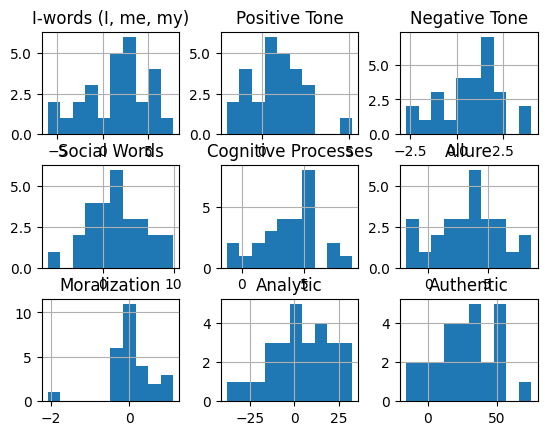

In [166]:
diff = likes-dislikes
diff.hist()

In [138]:
import scipy.stats as stats

In [152]:
stats.ttest_rel(likes['I-words (I, me, my)'], dislikes['I-words (I, me, my)'])

TtestResult(statistic=2.2805552668486873, pvalue=0.031013081209571382, df=26)

In [153]:
stats.ttest_rel(likes['Positive Tone'], dislikes['Positive Tone'])

TtestResult(statistic=2.7867116752438874, pvalue=0.009812811117290276, df=26)

In [154]:
stats.ttest_rel(likes['Negative Tone'], dislikes['Negative Tone'])

TtestResult(statistic=2.3700149264792305, pvalue=0.025489999430170298, df=26)

In [155]:
stats.ttest_rel(likes['Social Words'], dislikes['Social Words'])

TtestResult(statistic=2.2779375472043917, pvalue=0.031189965102745455, df=26)

In [157]:
stats.ttest_rel(likes['Cognitive Processes'], dislikes['Cognitive Processes'])

TtestResult(statistic=7.900380548762466, pvalue=2.2356024277414414e-08, df=26)

In [167]:
stats.ttest_rel(likes['Allure'], dislikes['Cognitive Processes'])

TtestResult(statistic=8.47236444231116, pvalue=5.9332031169871964e-09, df=26)

In [158]:
stats.ttest_rel(likes['Moralization'], dislikes['Moralization'])

TtestResult(statistic=0.3507772060495572, pvalue=0.7285817925428048, df=26)

In [159]:
stats.ttest_rel(likes['Analytic'], dislikes['Analytic'])

TtestResult(statistic=1.029274356695328, pvalue=0.3128313401621493, df=26)

In [160]:
stats.ttest_rel(likes['Authentic'], dislikes['Authentic'],)

TtestResult(statistic=6.610395847407672, pvalue=5.19623085604414e-07, df=26)

In [165]:
stats.ttest_rel(likes.mean(axis=1), dislikes.mean(axis=1))

TtestResult(statistic=6.18794459794818, pvalue=1.5189359382207396e-06, df=26)